# **TASK # 2**

# Using Unsupervised ML to predict optimum number of Iris clusters

# Author: Yusra Shereen

### **Importing Libraries**

In [81]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import metrics
import seaborn as sns
from sklearn.cluster import KMeans    
from sklearn.metrics import silhouette_score  

In [82]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### **Reading Data**

In [99]:
url = "/content/drive/MyDrive/Data Science Internship/Iris.csv"
data = pd.read_csv(url)
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


### **Exploring Data**

In [100]:
data.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


### **Data Cleaning (Checking for null values)**

In [101]:
data.isnull().sum()


Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [102]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [103]:
data['Species'].value_counts()

Iris-virginica     50
Iris-setosa        50
Iris-versicolor    50
Name: Species, dtype: int64

### **Analysing Input Data**

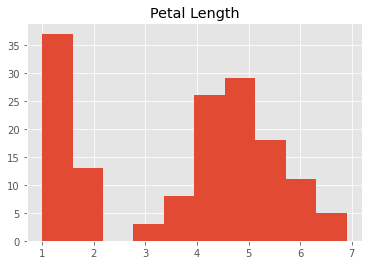

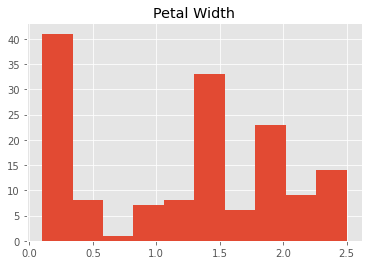

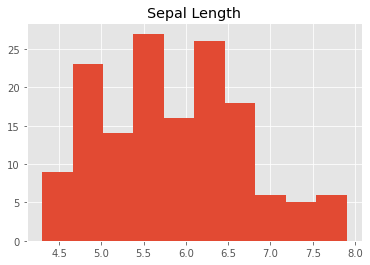

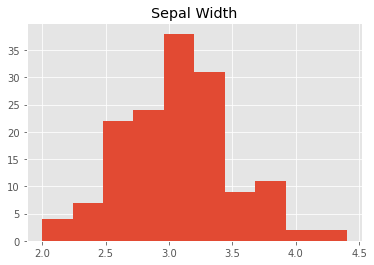

In [104]:

data['PetalLengthCm'].hist()
plt.title('Petal Length')
plt.show()
data['PetalWidthCm'].hist()
plt.title('Petal Width')
plt.show()
data['SepalLengthCm'].hist()
plt.title('Sepal Length')
plt.show()
data['SepalWidthCm'].hist()
plt.title('Sepal Width')
plt.show()

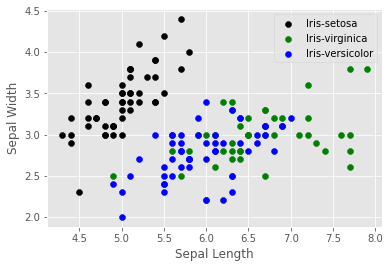

In [105]:
colors = ['black','green','blue']
species = ['Iris-setosa','Iris-virginica','Iris-versicolor']
for i in range(3):
  x = data[data['Species'] == species[i]]
  plt.scatter(x['SepalLengthCm'],x['SepalWidthCm'],c = colors[i], label = species[i])

plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.legend()
plt.show()

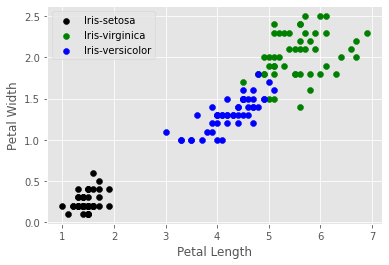

In [106]:
colors = ['black','green','blue']
species = ['Iris-setosa','Iris-virginica','Iris-versicolor']
for i in range(3):
  x = data[data['Species'] == species[i]]
  plt.scatter(x['PetalLengthCm'],x['PetalWidthCm'],c = colors[i], label = species[i])

plt.xlabel('Petal Length')
plt.ylabel('Petal Width')
plt.legend()
plt.show()

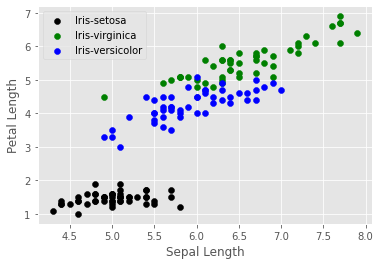

In [107]:
colors = ['black','green','blue']
species = ['Iris-setosa','Iris-virginica','Iris-versicolor']
for i in range(3):
  x = data[data['Species'] == species[i]]
  plt.scatter(x['SepalLengthCm'],x['PetalLengthCm'],c = colors[i], label = species[i])

plt.xlabel('Sepal Length')
plt.ylabel('Petal Length')
plt.legend()
plt.show()

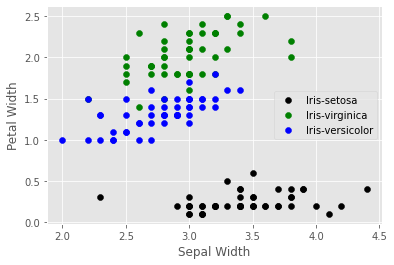

In [108]:
colors = ['black','green','blue']
species = ['Iris-setosa','Iris-virginica','Iris-versicolor']
for i in range(3):
  x = data[data['Species'] == species[i]]
  plt.scatter(x['SepalWidthCm'],x['PetalWidthCm'],c = colors[i], label = species[i])

plt.xlabel('Sepal Width')
plt.ylabel('Petal Width')
plt.legend()
plt.show()

In [109]:
data = data.drop(columns = ['Id'])
x = data.iloc[:,[0,1,2,3]].values
data.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


### **Finding Optimum number of Clusters**

Using Elbow method to find optimum clusters

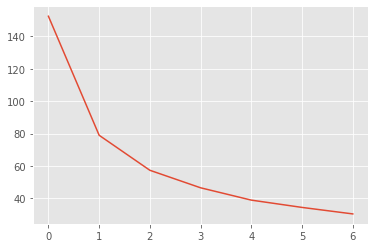

In [116]:
ssd = []
range_n_clusters = [2, 3, 4, 5, 6, 7, 8]
for num_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=num_clusters, max_iter=50)
    kmeans.fit(x)
    
    ssd.append(kmeans.inertia_)
    
# plot the SSDs for each n_clusters
plt.plot(ssd)

Elbow method shows that 3 clusters for given dataset(Iris dataset) are optimum

### **Fitting the model on K-mean**

In [117]:
kmeans = KMeans(n_clusters=3, max_iter=50)
y_pred = kmeans.fit_predict(x)
kmeans.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0], dtype=int32)

In [118]:
data['Cluster_Id'] = kmeans.labels_
data.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,Cluster_Id
0,5.1,3.5,1.4,0.2,Iris-setosa,1
1,4.9,3.0,1.4,0.2,Iris-setosa,1
2,4.7,3.2,1.3,0.2,Iris-setosa,1
3,4.6,3.1,1.5,0.2,Iris-setosa,1
4,5.0,3.6,1.4,0.2,Iris-setosa,1


### **Visualizing Clusters**

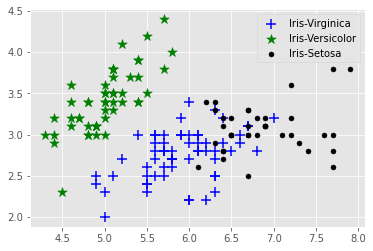

In [122]:
from matplotlib import style

plt.figure()
style.use('ggplot')

plt.scatter(x[y_pred == 0,0],x[y_pred == 0,1],s=100, color = 'blue',label = 'Iris-Virginica',marker = '+')
plt.scatter(x[y_pred == 1,0],x[y_pred == 1,1],s=100, color = 'green',label = 'Iris-Versicolor',marker = '*')
plt.scatter(x[y_pred == 2,0],x[y_pred == 2,1],s=100, color = 'black',label = 'Iris-Setosa',marker = '.')
plt.legend()
plt.show()